In [1]:
#to get dataset from kaggle
import opendatasets as od

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read csv file into data
data=pd.read_csv(r'C:\Users\Shreya\Task1-EDA\retail-sales-dataset\retail_sales_dataset.csv',encoding='unicode_escape')

In [4]:
#to get number of rows and columns
data.shape

(1000, 9)

In [5]:
#to get top 10 rows
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [6]:
#to get all info about data and show null vaules if present in any columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
#describe() method returns description of data in the dataframe i.e count, min,max,mean.std,etc
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
#to get sum of null-values in each column
pd.isnull(data).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
#to remove null values if present
data=data.dropna()

In [10]:
data.shape

(1000, 9)

In [11]:
#using describe() to describe specific columns
data[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [12]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

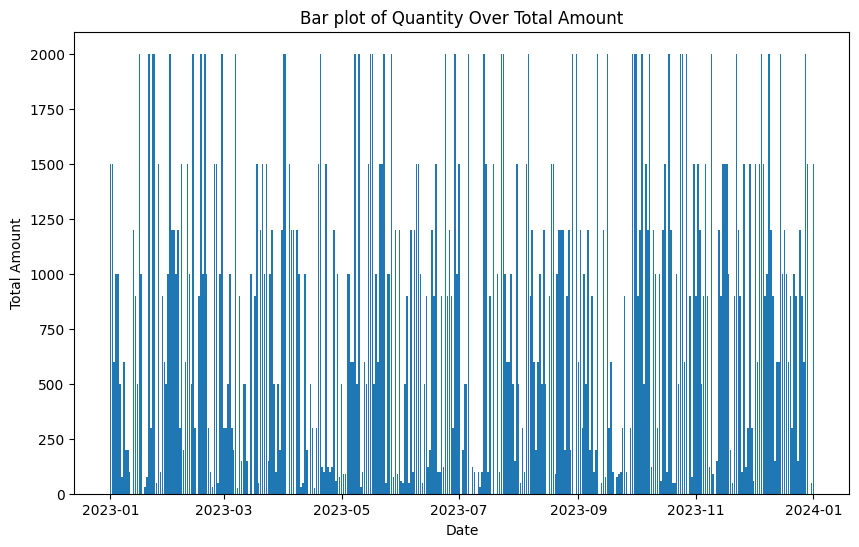

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Total Amount'])
plt.title('Bar plot of Quantity Over Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

<h1>1.Gender</h1>

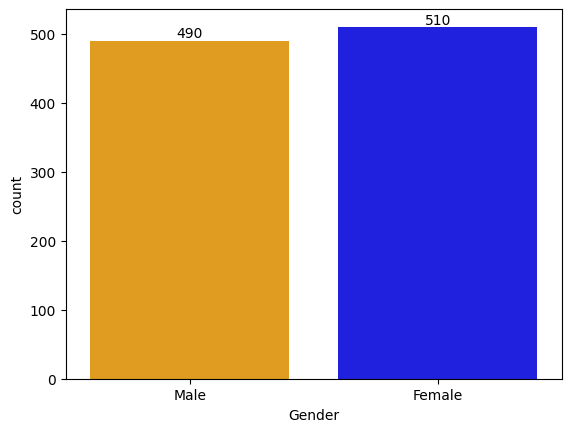

In [16]:
colors = {'Male': 'Orange', 'Female': 'blue'}
ax=sns.countplot(x='Gender',data=data,palette=colors.values(),hue='Gender')
#to get count number 
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
data.groupby(['Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Gender,Total Amount
0,Female,232840
1,Male,223160


<Axes: title={'center': 'Total Amount Over Gender'}, xlabel='Gender', ylabel='Total Amount'>

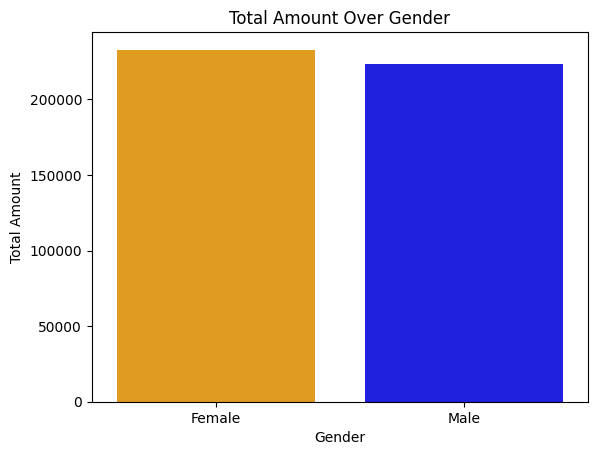

In [18]:
total_salesby_gender=data.groupby(['Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.title("Total Amount Over Gender")
sns.barplot(x='Gender',y='Total Amount',data=total_salesby_gender,palette=colors.values(),hue='Gender')

<h3>From above Graph it can be concluded almost buyers are Females</h3>

<h1>2.Age</h1>

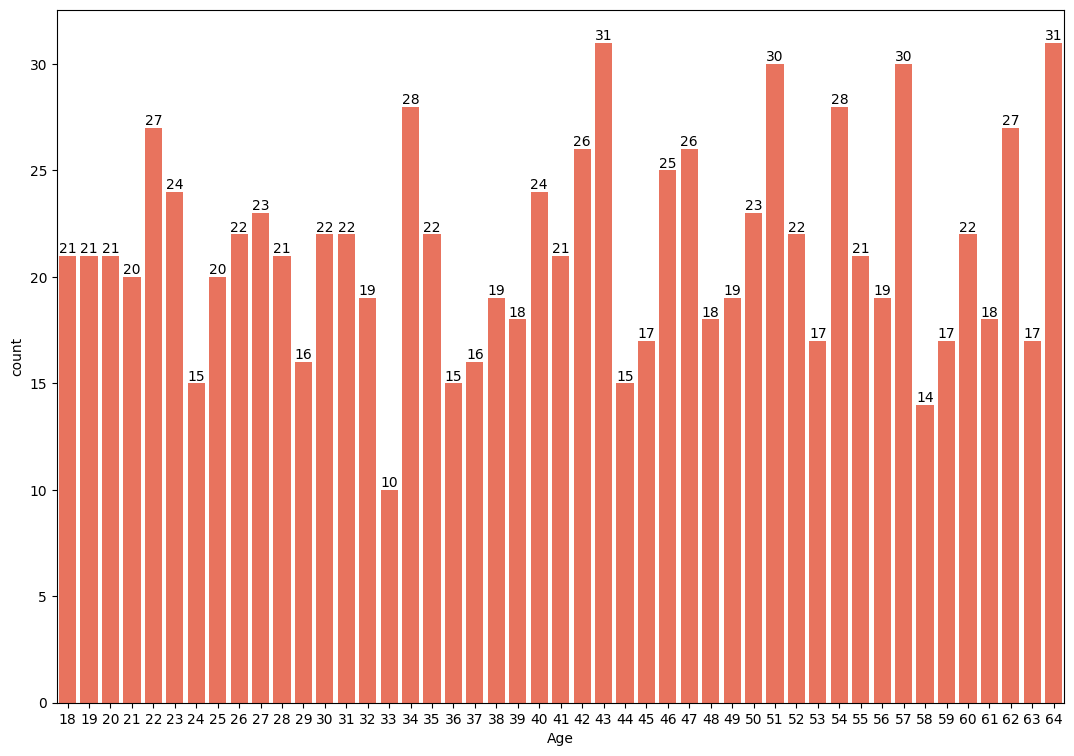

In [19]:
plt.figure(figsize=(13,9))
ax=sns.countplot(x='Age',data=data,color='#FF6347')

for bars in ax.containers:
    ax.bar_label(bars)

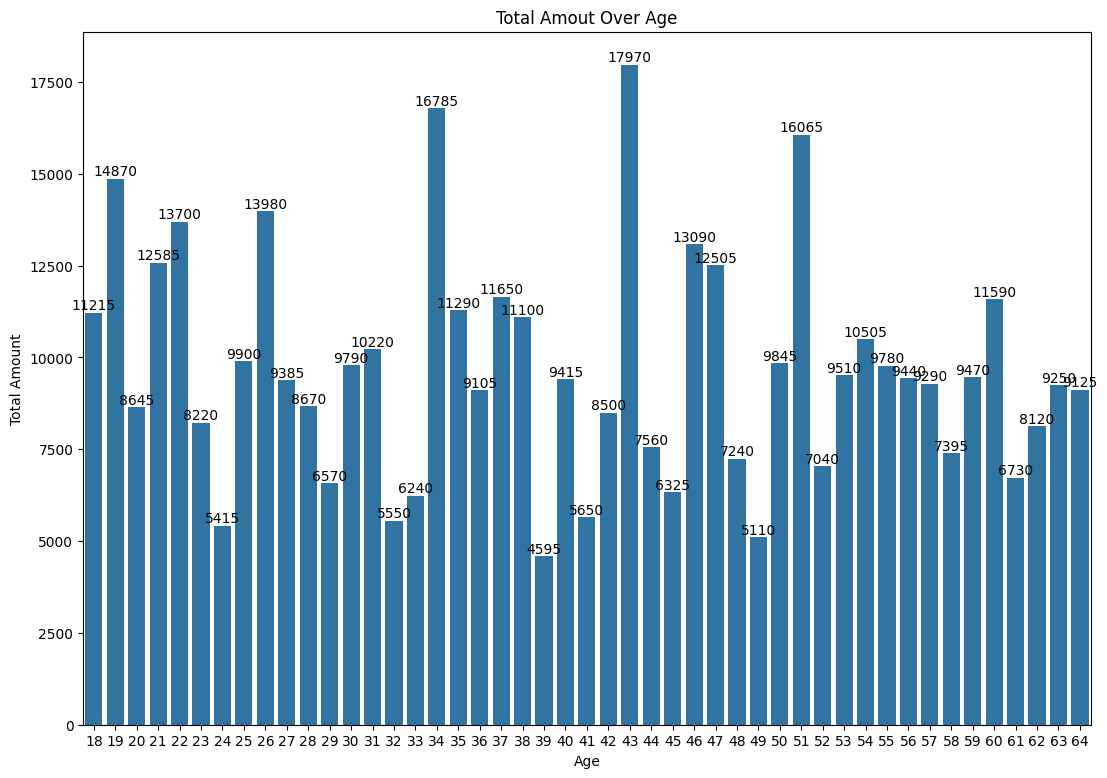

In [20]:
total_salesby_Age=data.groupby(['Age'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.figure(figsize=(13,9))
plt.title("Total Amout Over Age")
ax=sns.barplot(x='Age',y='Total Amount',data=total_salesby_Age)
for bars in ax.containers:
    ax.bar_label(bars)

From above Graph we can analyse that most of buyers are of age 43,32,51

In [21]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

<h1>3.Product category</h1>

In [22]:
data.groupby(['Product Category'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


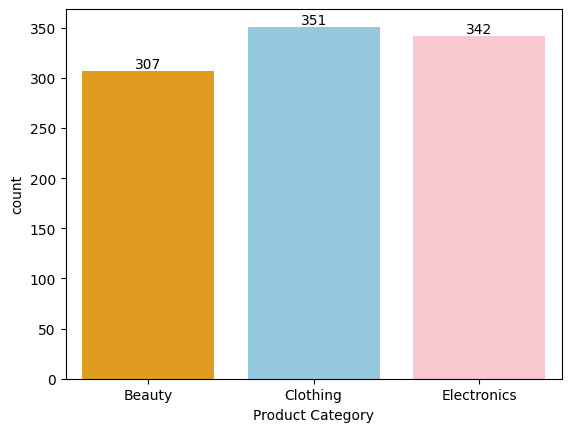

In [23]:
colors = {'Electronics': 'Orange', 'Clothing': 'Skyblue','Beauty':'Pink'}
ax=sns.countplot(x='Product Category',data=data,palette=colors.values(),hue='Product Category')
#to get count number 
for bars in ax.containers:
    ax.bar_label(bars)

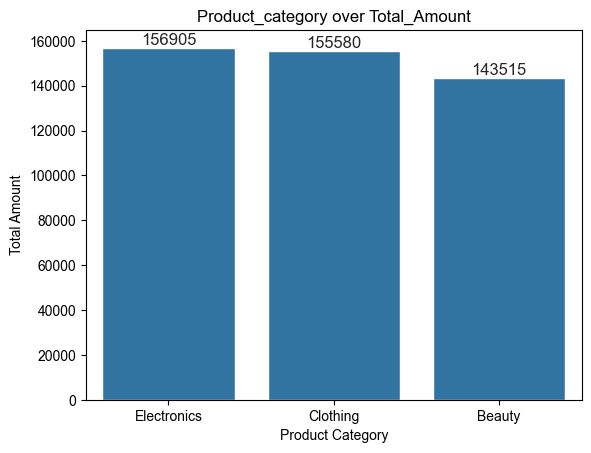

In [24]:
total_productby_amount=data.groupby(['Product Category'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.title("Product_category over Total_Amount")
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Product Category',y='Total Amount',data=total_productby_amount)
for bars in ax.containers:
    ax.bar_label(bars)

<h3>From above Graph we can analyse that Eclectronics Product has the upper hand in Total Amount</h3>
<br>

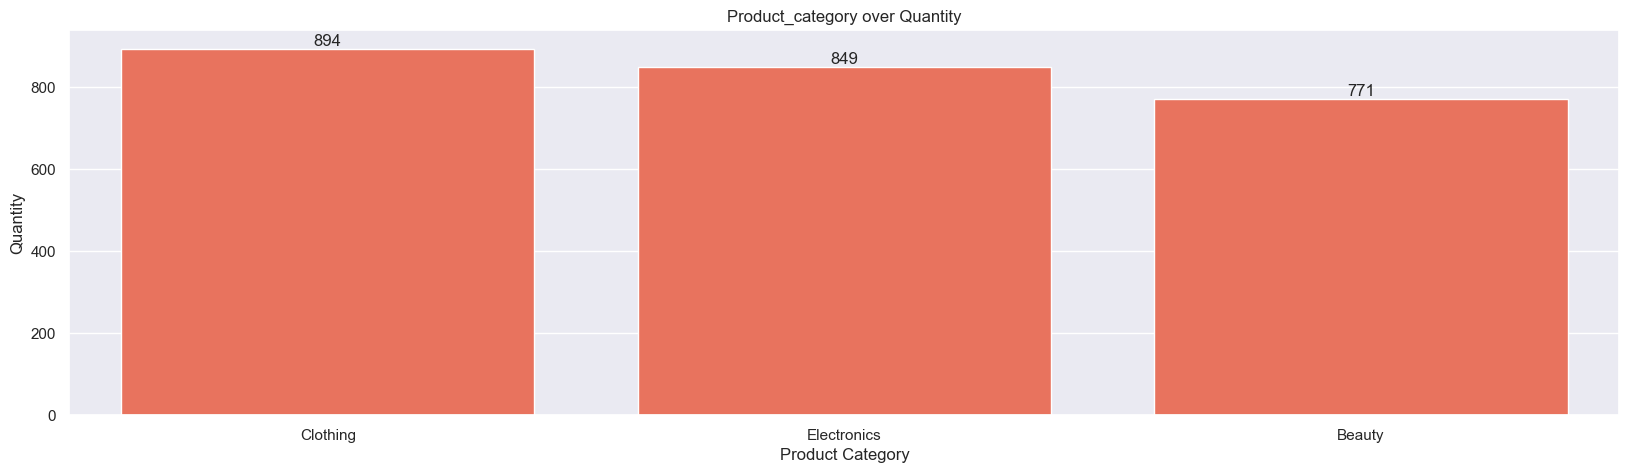

In [25]:
total_productby_Quantity=data.groupby(['Product Category'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.title("Product_category over Quantity")
ax=sns.barplot(x='Product Category',y='Quantity',data=total_productby_Quantity,color='#FF6347')
for bars in ax.containers:
    ax.bar_label(bars)

<h3>From Above we can analyse that clothing product has been sold more in quantity</h3>
<br>

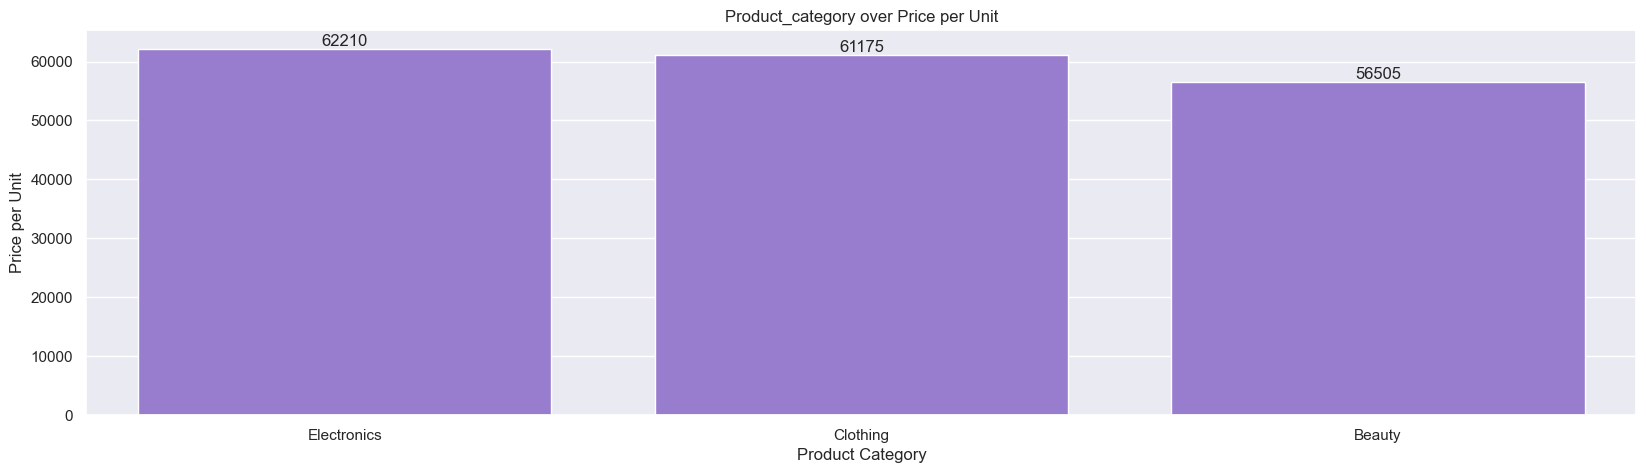

In [26]:
total_productby_PPU=data.groupby(['Product Category'],as_index=False)['Price per Unit'].sum().sort_values(by='Price per Unit',ascending=False)
plt.title("Product_category over Price per Unit")
ax=sns.barplot(x='Product Category',y='Price per Unit',data=total_productby_PPU,color='#9370DB')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Total Amount', ylabel='Product Category'>

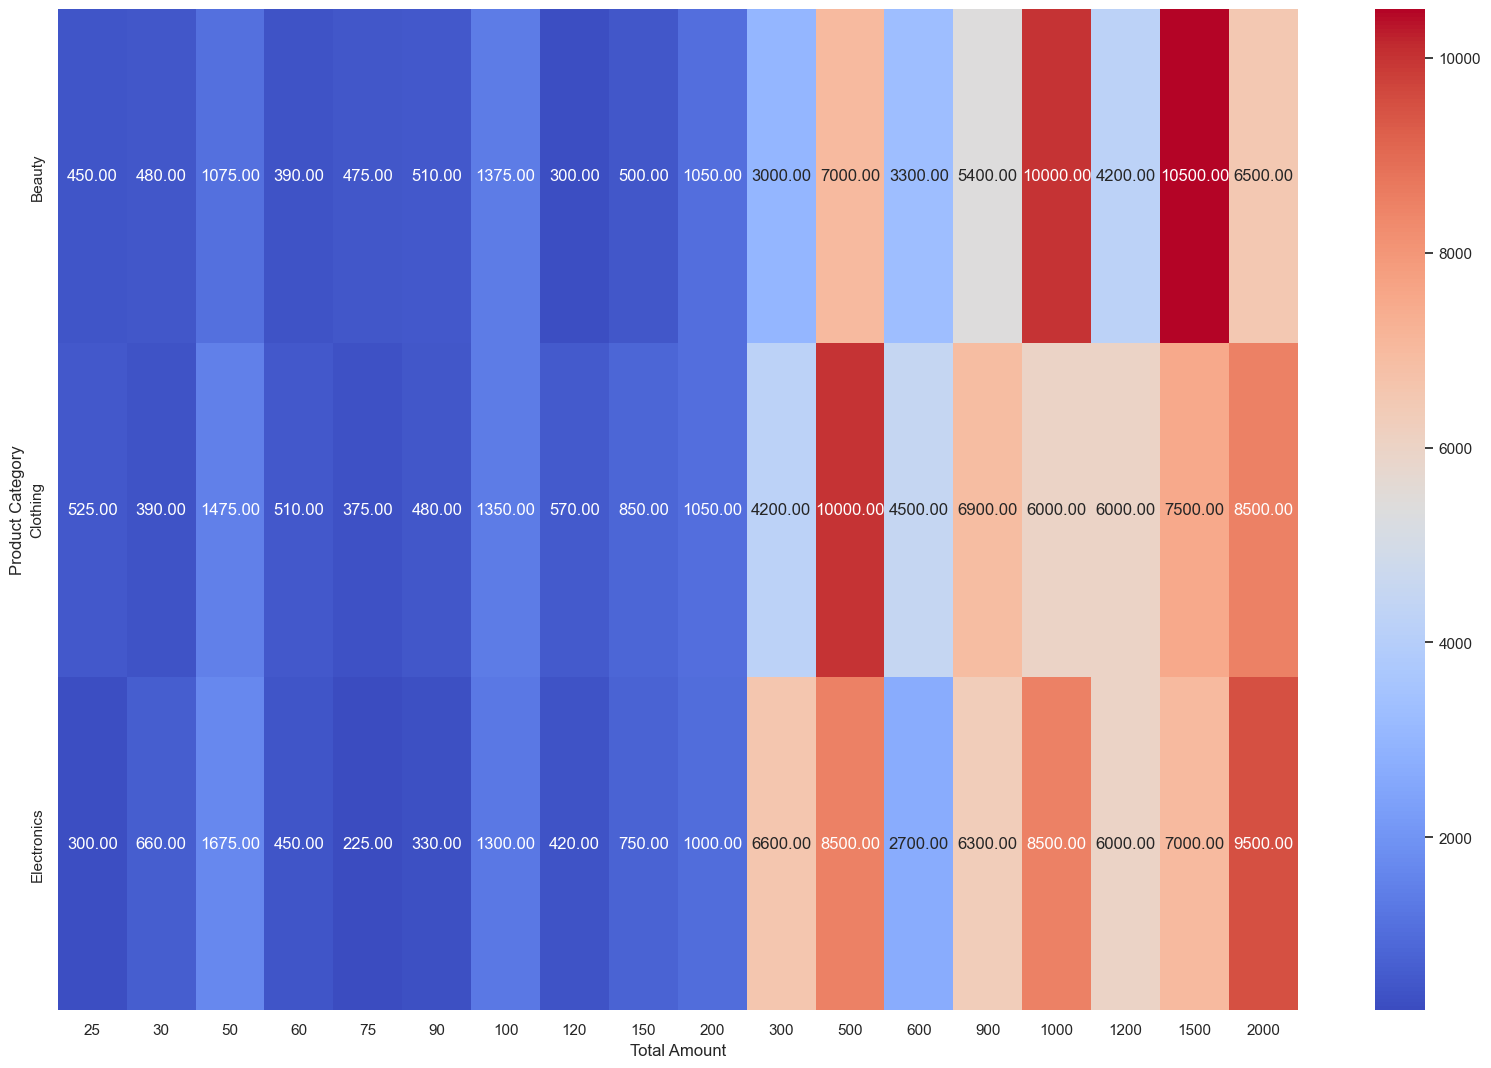

In [27]:
heatmap_data = data.pivot_table(index='Product Category', columns='Total Amount', values='Price per Unit', aggfunc='sum')
plt.figure(figsize=(20, 13)) 
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
 

In [28]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

<h1>To know which product is mostly bought by males and females</h1>

In [29]:
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

male_product_totals = male_data.groupby('Product Category')['Quantity'].sum()
female_product_totals = female_data.groupby('Product Category')['Quantity'].sum()

most_bought_product_male = male_product_totals.idxmax()
most_bought_product_female = female_product_totals.idxmax()


<h4>Females</h4>

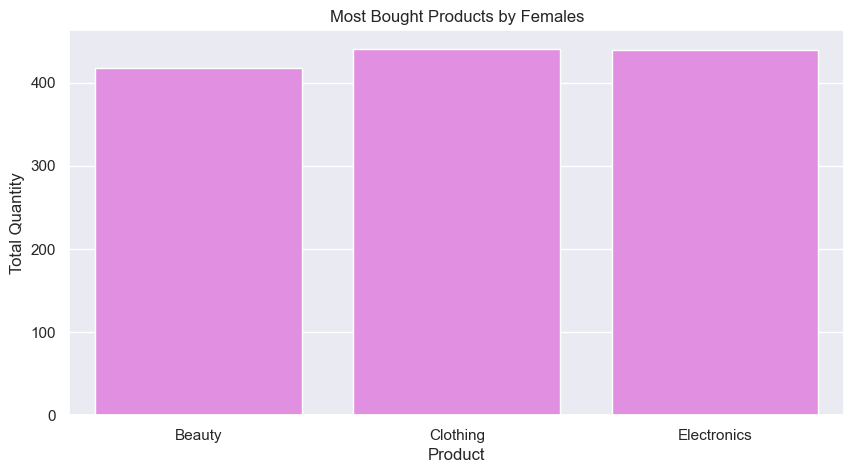

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=female_product_totals.index, y=female_product_totals.values, color='violet')
plt.title('Most Bought Products by Females')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.show()

<h4>Males</h4>

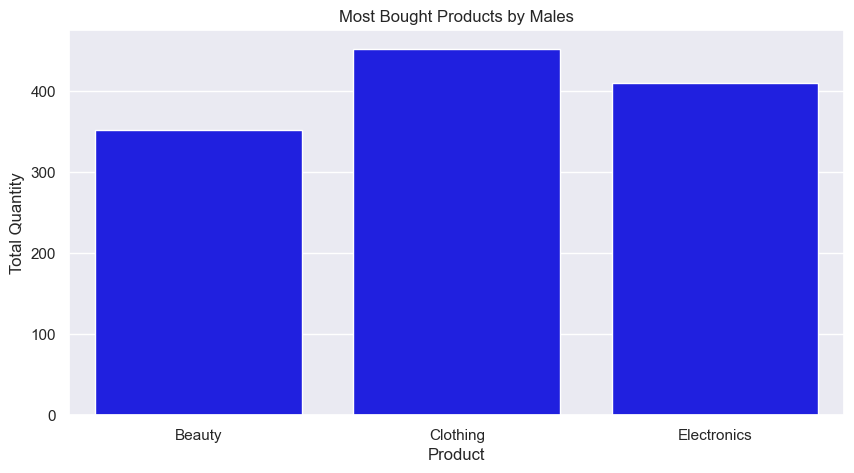

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=male_product_totals.index, y=male_product_totals.values, color='blue')
plt.title('Most Bought Products by Males')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.show()

<h1>CONCLUSION/Recommendations</h1>
<br>
<h3>-> We can conclude that Females with age of 43 are most likely to buy clothing products from product category followed by electronics and beauty</h3>
<h3>->We also conclude that most of the bought products by males and females is Clothing followed by Electronics and then beauty</h3>
<h3>->But Electronics has upper hand in Total Amount due its higher Price per Unit</h3>
